In [1]:
from typing import Set


from solver import BTSPSolverSAT
from util import random_points, draw_edges, export_instance, import_instance, suppress_stdout

In [2]:
%load_ext autoreload
%autoreload 2

New best bottleneck: 7358.069583797098!
The bottleneck 5256.331134926718 created an unconnected graph!
New best bottleneck: 6496.001000615686!
The bottleneck 6012.897221805808 created an unconnected graph!
The bottleneck 6169.636618148593 is infeasible!
Time taken: 0.001678999999999764


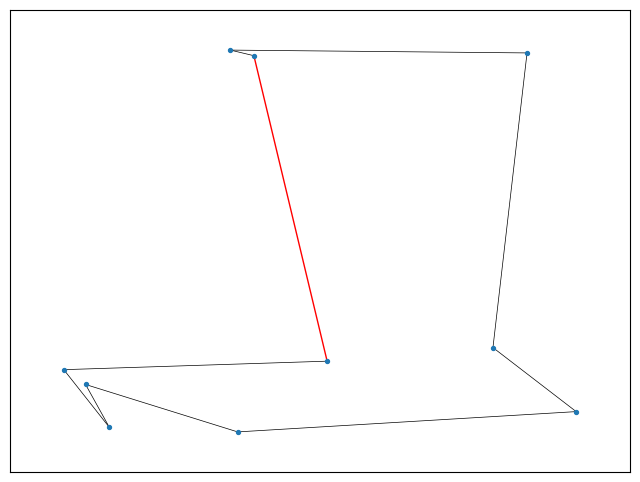

In [3]:
points = import_instance("10.json")
solver = BTSPSolverSAT(points, 2)
edges, time_taken = solver.solve(0)
print("Time taken: " + str(time_taken))
draw_edges(edges)

In [4]:
for i in range(5,16):
    export_instance(str(i)+".json",random_points(i))

# Benchmarks

In [5]:
def benchmark(points):
    solver = BTSPSolverSAT(points, 2)
    with suppress_stdout():
        edges, time_taken = solver.solve(0)
    print("Method: Binary Search; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(1)
    print("Method: Linear Search Descending; Time taken: " + str(time_taken))

    with suppress_stdout():
        edges, time_taken = solver.solve(2)
    print("Method: Linear Search Ascending; Time taken: " + str(time_taken))

In [6]:
benchmark(import_instance("14.json"))

Method: Binary Search; Time taken: 0.4807579999999998
Method: Linear Search Descending; Time taken: 0.4848761999999991
Method: Linear Search Ascending; Time taken: 0.4862112000000014


New best bottleneck: 6170.754572983761!
New best bottleneck: 4526.738781948877!
The bottleneck 3353.201007992214 is infeasible!
The bottleneck 3876.984653051905 is infeasible!
The bottleneck 4158.356646561235 is infeasible!
The bottleneck 4313.931153831734 is infeasible!
The bottleneck 4412.041930897756 is infeasible!


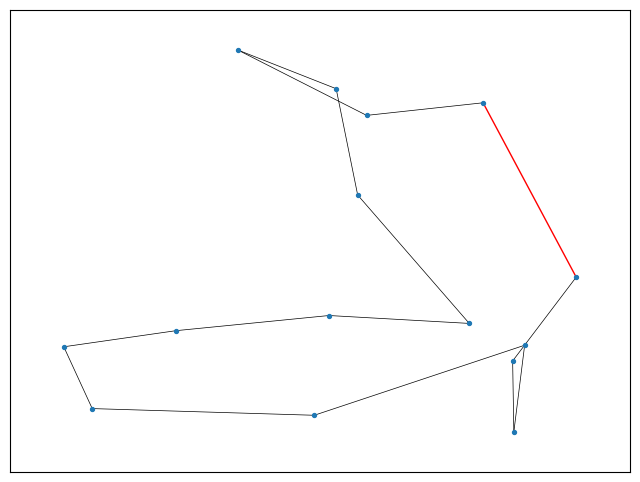

Time taken without greedy: 0.9206781000000142
Greedy bottleneck: 4920.475586770043
Time taken greedy: 0.00011467933654785156


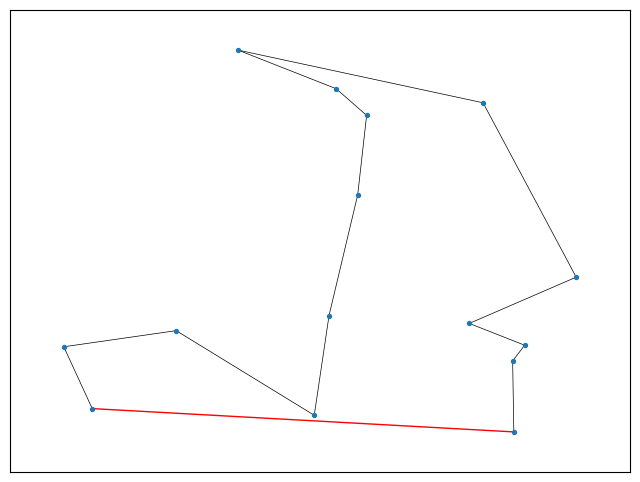

New best bottleneck: 5337.082536367599!
The bottleneck 4063.219536279082 is infeasible!
New best bottleneck: 4526.738781948877!
The bottleneck 4313.931153831734 is infeasible!
The bottleneck 4412.041930897756 is infeasible!


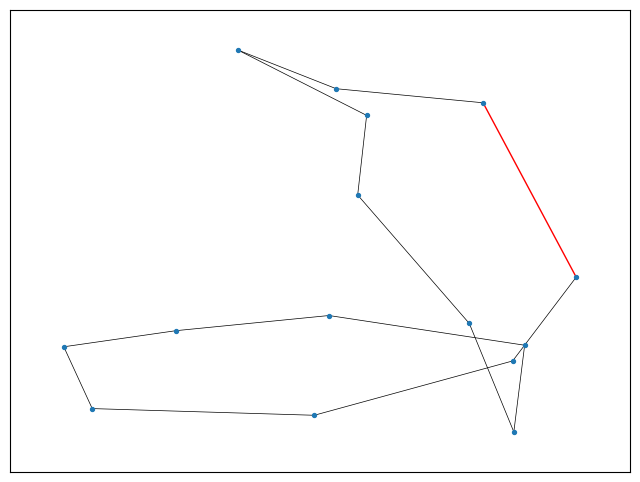

Time taken with greedy: 0.513143399999997


In [15]:
import signal
import time

def timeout(signum, frame):
    print('Signal handler called with signal',
          signum)
    raise OSError("timeout exceeded!")

def benchmark_time():
    signal.signal(signal.SIGALRM, timeout)

    signal.alarm(60)
    start = time.time()
    num_points = 1
    try:
        while True:
            print(f'Points: {num_points}')
            solver = BTSPSolverSAT(random_points(i), 2)
            # Use binary search as it is most performant
            solver.solve(0)
            num_points += 1
    except OSError as e:
        print(e)
    signal.alarm(0)
    print(f'Biggest instance to solve in under 60 sec: {num_points - 1}')
    print(f'Failed at {num_points} points')

benchmark_time()